In [1]:
import numpy as np
import datetime
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix
tf.__version__

'2.3.0'

In [2]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

C:\Users\Tymon\anaconda3\envs\cifar10\lib\site-packages\matplotlib\text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


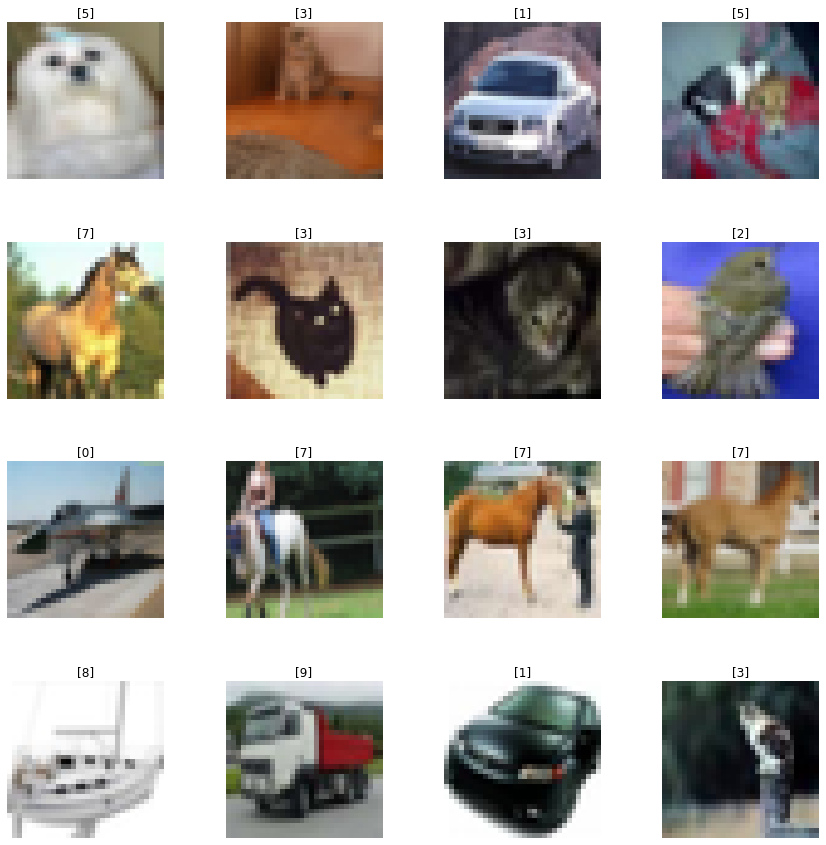

In [3]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15, 15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4);

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
number_cat = 10
y_train = tf.keras.utils.to_categorical(y_train, number_cat)
y_test = tf.keras.utils.to_categorical(y_test, number_cat)

In [7]:
y_train.shape

(50000, 10)

In [8]:
y_test.shape

(10000, 10)

In [9]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

In [10]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = input_shape))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(number_cat, activation = 'softmax'))
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [11]:
cnn.compile(optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6), 
            loss ='categorical_crossentropy', metrics =['accuracy'])

In [12]:
epochs = 100
with tf.device('/GPU:0'):
    history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/100
98/98 [==============================] - 43s 443ms/step - loss: 2.0714 - accuracy: 0.2352
Epoch 2/100
98/98 [==============================] - 43s 438ms/step - loss: 1.8282 - accuracy: 0.3382
Epoch 3/100
98/98 [==============================] - 43s 439ms/step - loss: 1.7184 - accuracy: 0.3768
Epoch 4/100
98/98 [==============================] - 44s 448ms/step - loss: 1.6514 - accuracy: 0.4004
Epoch 5/100
98/98 [==============================] - 46s 468ms/step - loss: 1.5946 - accuracy: 0.4204
Epoch 6/100
98/98 [==============================] - 45s 463ms/step - loss: 1.5506 - accuracy: 0.4363
Epoch 7/100
98/98 [==============================] - 45s 456ms/step - loss: 1.5100 - accuracy: 0.4510
Epoch 8/100
98/98 [==============================] - 46s 464ms/step - loss: 1.4754 - accuracy: 0.4664
Epoch 9/100
98/98 [==============================] - 45s 457ms/step - loss: 1.4442 - accuracy: 0.4761
Epoch 10/100
98/98 [==============================] - 45s 455ms/step - loss: 1.414

98/98 [==============================] - 44s 446ms/step - loss: 0.5701 - accuracy: 0.8003
Epoch 81/100
98/98 [==============================] - 45s 461ms/step - loss: 0.5606 - accuracy: 0.8016
Epoch 82/100
98/98 [==============================] - 46s 473ms/step - loss: 0.5579 - accuracy: 0.8026
Epoch 83/100
98/98 [==============================] - 47s 476ms/step - loss: 0.5515 - accuracy: 0.8057
Epoch 84/100
98/98 [==============================] - 44s 453ms/step - loss: 0.5427 - accuracy: 0.8090
Epoch 85/100
98/98 [==============================] - 45s 458ms/step - loss: 0.5409 - accuracy: 0.8096
Epoch 86/100
98/98 [==============================] - 45s 455ms/step - loss: 0.5329 - accuracy: 0.8127
Epoch 87/100
98/98 [==============================] - 44s 453ms/step - loss: 0.5267 - accuracy: 0.8137
Epoch 88/100
98/98 [==============================] - 45s 459ms/step - loss: 0.5201 - accuracy: 0.8173
Epoch 89/100
98/98 [==============================] - 44s 451ms/step - loss: 0.5157 - 

In [13]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 2s 8ms/step - loss: 0.6913 - accuracy: 0.7698
Test Accuracy: 0.7698000073432922


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


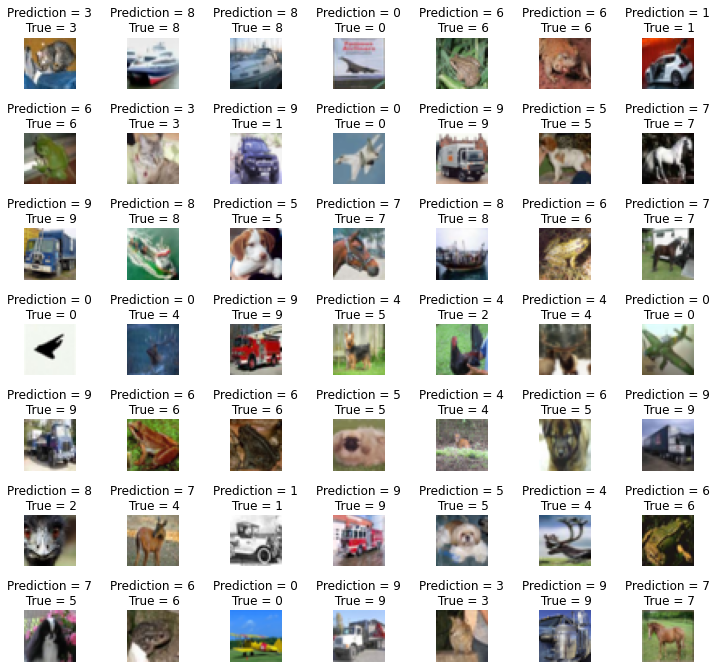

In [14]:
predicted_classes = cnn.predict_classes(X_test) 
y_test = y_test.argmax(1)
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<AxesSubplot:>

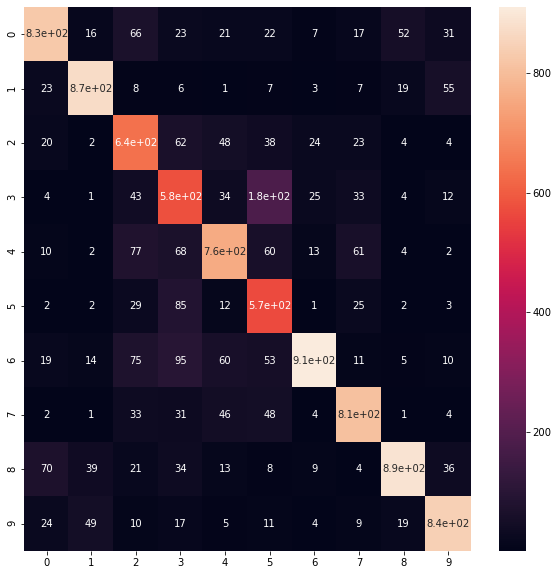

In [15]:
cm = confusion_matrix(predicted_classes, y_test)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [16]:
cnn.save('cifar10.h5')

In [17]:
model2 = tf.keras.models.load_model('cifar10.h5')
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [18]:
model2.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [19]:
img = tf.io.read_file('caminhão.jpg');
img = tf.image.decode_jpeg(img, channels=3)
img.set_shape([None, None, 3])
img = tf.image.resize(img, (32, 32))
img = np.expand_dims(img, axis=0)
img.shape

(1, 32, 32, 3)

In [20]:
pred = model2.predict_classes(img)
pred

array([9], dtype=int64)